In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df=pd.read_csv('Indian_Domestic_Airline.csv')
df.head()

,AirLine_Name,Rating - 10,Title,Name,Date,Review,Recommond
0,AirAsia India,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes
1,AirAsia India,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no
2,AirAsia India,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes
3,AirAsia India,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no
4,AirAsia India,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes


In [ ]:
df.describe()

,Rating - 10
count,2206.000000
mean,4.033092
std,3.582053
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,10.000000


In [ ]:
df.dtypes

,0
AirLine_Name,object
Rating - 10,float64
Title,object
Name,object
Date,object
Review,object
Recommond,object


In [ ]:
!pip install nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Import necessary libraries
import re  # Import the re module for regular expressions
import nltk  # Import the nltk module for stopword removal

# Download the stopwords corpus if you haven't already
# This only needs to be done once
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError as e:

    nltk.download('stopwords')
except LookupError as e:
    # This catches the LookupError raised when the resource is not found
    print(f"Resource not found: {e}. Attempting to download.")
    nltk.download('stopwords')

from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



def preprocess_text(text):
    # Check if the input is a string before processing
    if not isinstance(text, str):
        # Consider logging a warning or handling non-string types appropriately
        return ""  # Return an empty string or handle non-string input as appropriate

    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Review' column
df['Review'] = df['Review'].apply(preprocess_text)

In [ ]:
#  Train-test split
X = df['Review']
y = df['Recommond']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for performance
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
#  Logistic Regression Model Training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Predict sentiment for new review
def predict_sentiment(review):
    review_clean = preprocess_text(review)
    review_vec = vectorizer.transform([review_clean])
    pred = model.predict(review_vec)[0]
    return "Positive" if pred == 1 else "Negative"

sample_review = "I am very happy with the product quality."
print(f"Review: '{sample_review}' --> Sentiment Prediction: {predict_sentiment(sample_review)}")

Accuracy: 0.9027149321266968

Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.96      0.93       301
         yes       0.90      0.79      0.84       141

    accuracy                           0.90       442
   macro avg       0.90      0.87      0.88       442
weighted avg       0.90      0.90      0.90       442


Confusion Matrix:
 [[288  13]
 [ 30 111]]
Review: 'I am very happy with the product quality.' --> Sentiment Prediction: Negative


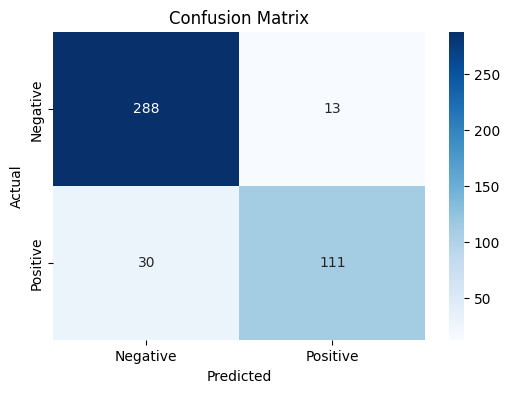

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


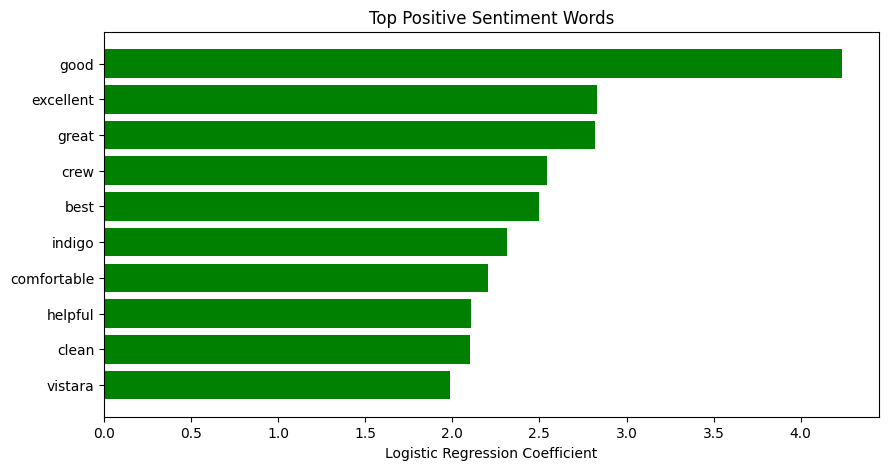

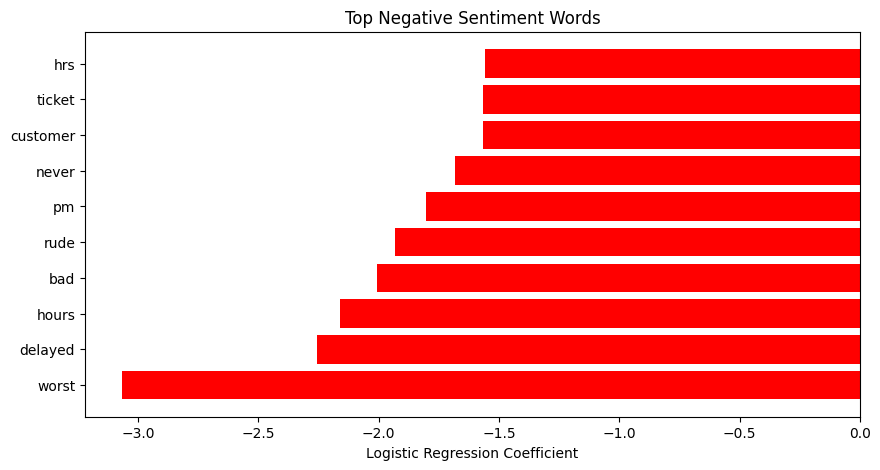

In [ ]:
# Get feature names and model coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Get top positive and negative features
top_n = 10
top_pos_indices = np.argsort(coefficients)[-top_n:]
top_neg_indices = np.argsort(coefficients)[:top_n]

top_pos_words = [feature_names[i] for i in top_pos_indices]
top_neg_words = [feature_names[i] for i in top_neg_indices]

top_pos_weights = coefficients[top_pos_indices]
top_neg_weights = coefficients[top_neg_indices]

# Plot positive and negative influential words
plt.figure(figsize=(10, 5))
plt.barh(top_pos_words, top_pos_weights, color='green')
plt.title("Top Positive Sentiment Words")
plt.xlabel("Logistic Regression Coefficient")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_neg_words, top_neg_weights, color='red')
plt.title("Top Negative Sentiment Words")
plt.xlabel("Logistic Regression Coefficient")
plt.show()
